# **Modelo Preditivo para Resultados Clínicos da Tuberculose com Redes Neurais Multi-Layer Perceptrons (MLPs)**


## **Conteúdo**

- INTRODUÇÃO

- REVISÃO DA LITERATURA

- MATERIAIS E MÉTODOS

  - Conjunto de Dados

  - Análise Exploratória de Dados

  - Pré-processamento dos Dados

  - Balanceamneto de Classes

  - Modelagem e Avaliação

- RESULTADOS

- CONCLUSÕES



## **Importando as Bibliotecas Necessárias**

In [1]:
# Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter

## **INTRODUÇÃO**

A Tuberculose (TB) é uma doença infecciosa transmitida causada pela bactéria *Mycobacterium*, que atinge principalmente os pulmões humanos. O tratamento da tuberculose é influenciado por diversos fatores, tornando-se um processo difícil. Neste contexto, a aplicação de Inteligência Artificial (IA) e Aprendizado de Máquina (ML) tem se destacado como uma solução promissora. Redes Neurais Artificiais (RNAs), como o Multilayer Perceptron (MLP), são eficazes na previsão dos resultados do tratamento da tuberculose. Modelos de ML podem identificar pacientes em risco de falha no tratamento, permitindo intervenções rápidas e personalizadas.

## **Objetivos do Estudo**

Este estudo tem como objetivo desenvolver um modelo de aprendizado de máquina para prever os desfechos do tratamento da Tuberculose (cura ou abandono). A análise dos dados dos pacientes foi realizada com um Multilayer Perceptron, utilizando técnicas de balanceamento, como o SMOTETomek, e dropout para evitar overfitting. Os atributos de entrada foram selecionados com base na literatura, sendo classificados em categorias sociais e clínicas

## **Organização do Artigo**

O restante do artigo é organizado da seguinte forma: os principais trabalhos correlatos são detalhados na Seção 2. A Seção 3 apresenta a metodologia utilizada, detalhando o modelo proposto. A seção 4 apresenta os resultados obtidos para a previsão de desfecho de tratamento.  Por fim, as principais conclusões alcançadas são resumidas e os trabalhos futuros explicados na Seção 5.

## **REVISÃO DA LITERATURA**

Existem diversos estudos que aplicam inteligência artificial e aprendizado de máquina ao tratamento da tuberculose. Esta seção destaca alguns desses trabalhos e os relaciona com o estudo proposto neste artigo.

No estudo de Lian et al. (2023), os autores propuseram modelos preditivos para hepatite aguda, insuficiência respiratória aguda e mortalidade após o tratamento da tuberculose, utilizando seis algoritmos de aprendizado de máquina (XGBoost, random forest, MLP, light GBM, regressão logística e SVM). Os resultados indicaram que o MLP obteve o maior valor de Área sobre a curva (AUC) (0,834) para a predição de mortalidade.

No trabalho de Janah et al. (2024), os autores desenvolveram e avaliaram um MLP e Extreme Learning Machine (ELM) para a detecção precoce de TB utilizando dados clínicos. Foram realizados testes de balanceamento de dados com a Técnica de Sobreamostragem Minoritária (SMOTE). O melhor resultado obtido foi uma acurácia de 95% com o modelo MLP, sem a aplicação da técnica de SMOTE.

No estudo de Mohidem et al. (2021), os autores desenvolveram um modelo para prever o número de casos de TB no distrito de Gombak, na Malásia, com base em fatores sociodemográficos e ambientais. Foram utilizadas Regressão Linear Múltipla (MLR) e Redes Neurais Artificiais (RNA) para desenvolver o modelo. A abordagem que apresentou os melhores resultados foi a RNA3, que avaliou a relação entre os aspectos sociodemográficos e os fatores ambientais, alcançando uma acurácia de 96%.

Um estudo de Orjuela et al. (2022) explorou o uso de aprendizado de máquina no diagnóstico de tuberculose em cenários com recursos limitados. Foram desenvolvidos modelos com técnicas como regressão logística, árvores de classificação, random forest, SVM e redes neurais artificiais. O modelo de RNA obteve os melhores resultados, destacando-se em acurácia, sensibilidade e AUC.

Embora existam diversos estudos sobre o uso de aprendizado de máquina para prever desfechos de doenças infecciosas, incluindo a tuberculose, poucos investigam o impacto específico de redes MLP combinadas com técnicas de balanceamento para prever desfechos de tratamento. Este estudo foca na combinação de MLP e SMOTETomek, avaliando a eficácia dessas técnicas em cenários de desequilíbrio de alto nível.


## **MATERIAS E MÉTODOS**

Nesta seção, são detalhadas as etapas e os métodos utilizados para o desenvolvimento do modelo para a predição dos desfechos de tratamento da tuberculose. Detalharam-se os passos desde o conjunto de dados, pré-processamento, modelagem e avaliação dos dados, para desenvolver um modelo robusto. O fluxo de trabalho metodológico utilizado neste estudo está resumido na Figura 1 abaixo.


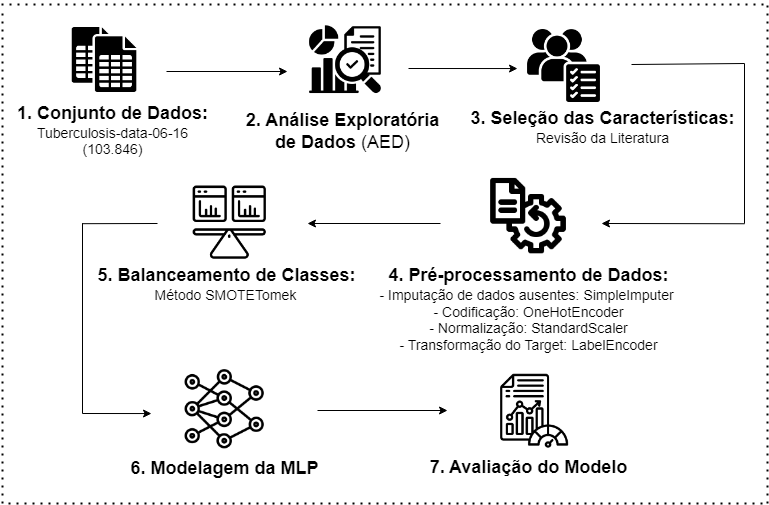

## **Conjunto de Dados**

A base de dados (dataset) utilizada está disponível no repositório público(https://figshare.com/articles/dataset/tuberculosis-data-06-16_csv/8066663?file=15032345), este estudo analisou dados de 103.846 prontuários de pacientes com tuberculose no estado de São Paulo, obtidos de 2006 a 2016 por meio do TBWEB, sistema de informação utilizado para monitoramento da tuberculose. O conjunto de dados inclui variáveis demográficas, clínicas e de tratamento.

O dataset contém 103846 registros (linhas) e  47 características (colunas).

## **Lendo o Dataset**

A primeira etapa é ler o conjunto de dados do arquivo csv que baixamos. Usaremos a função read_csv() do pacote Pandas Python:

In [2]:
# Carregando o Conjunto de Dados

df = pd.read_csv('tuberculosis.csv')

## **Visualizando o Dataset (Análises Descritivas)**

In [ ]:
# Visualizando as 5 primeiras linhas
df.head()

,Unnamed: 0,racaCor,faixaEtaria,sexo,gestante,ESCOLARID,TIPOCUP,codTratAnt,tratouha,sitAtual,...,esqAtual,motMudEsquema,tipoTrat,nDosesPri,nDosesSeg,idade,HISTOPATOL,OUTRAIMUNO,resistencia,mtvInter1
0,2,Pardo,20_29,M,NaN,De 1 a 3 anos,Outra,1.0,0.0,Abandono,...,NaN,NaN,Auto-Administrado,0.0,0.0,26.0,N/realiz,N,NaN,Elucidacao Diagnostica
1,4,Pardo,30_39,M,NaN,De 4 a 7 anos,Outra,1.0,0.0,Cura,...,NaN,NaN,Supervisionado,0.0,0.0,38.0,N/realiz,N,NaN,Insuficiencia Respiratoria Aguda
2,7,NaN,20_29,M,NaN,De 4 a 7 anos,Outra,NaN,0.0,Abandono,...,NaN,NaN,Supervisionado,0.0,0.0,24.0,N/realiz,N,SENS,NaN
3,15,NaN,30_39,F,NaN,NaN,Dona de Casa,1.0,0.0,Cura,...,NaN,NaN,Auto-Administrado,0.0,0.0,35.0,N/realiz,N,SENS,Abscesso
4,45,Branco,40_49,M,NaN,De 4 a 7 anos,Outra,1.0,0.0,Cura,...,NaN,NaN,NaN,0.0,0.0,41.0,N/realiz,N,NaN,Elucidacao Diagnostica


In [ ]:
# As 5 ultimas linhas
df.tail()

,Unnamed: 0,racaCor,faixaEtaria,sexo,gestante,ESCOLARID,TIPOCUP,codTratAnt,tratouha,sitAtual,...,esqAtual,motMudEsquema,tipoTrat,nDosesPri,nDosesSeg,idade,HISTOPATOL,OUTRAIMUNO,resistencia,mtvInter1
103841,208610,Preto,20_29,F,N,De 4 a 7 anos,Desempregado,1.0,0.0,Cura,...,NaN,NaN,Supervisionado,32.0,61.0,28.0,N/realiz,N,NaN,NaN
103842,208615,Branco,30_39,M,NaN,De 1 a 3 anos,Outra,1.0,0.0,Cura,...,NaN,NaN,Supervisionado,60.0,54.0,36.0,N/realiz,N,NaN,NaN
103843,208616,Preto,30_39,F,N,De 8 a 11 anos,Outra,1.0,0.0,Abandono,...,NaN,NaN,Supervisionado,31.0,0.0,31.0,NaN,N,NaN,NaN
103844,208617,Pardo,60_69,F,N,De 12 a 14 anos,Aposentado,1.0,0.0,Cura,...,NaN,NaN,Supervisionado,40.0,82.0,66.0,N/realiz,S,NaN,NaN
103845,208619,Pardo,30_39,F,N,De 4 a 7 anos,Dona de Casa,1.0,0.0,Abandono,...,NaN,NaN,Supervisionado,24.0,18.0,33.0,NaN,N,SENS,NaN


In [ ]:
# Tamanho da Base
df.shape

(103846, 47)

In [ ]:
# Verificando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103846 entries, 0 to 103845
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          103846 non-null  int64  
 1   racaCor             89811 non-null   object 
 2   faixaEtaria         103846 non-null  object 
 3   sexo                103846 non-null  object 
 4   gestante            34483 non-null   object 
 5   ESCOLARID           83686 non-null   object 
 6   TIPOCUP             91755 non-null   object 
 7   codTratAnt          100217 non-null  float64
 8   tratouha            103846 non-null  float64
 9   sitAtual            103846 non-null  object 
 10  tipoCaso            103846 non-null  object 
 11  FORMACLIN1          103838 non-null  object 
 12  FORMACLIN2          3802 non-null    object 
 13  FORMACLIN3          231 non-null     object 
 14  classif             103845 non-null  object 
 15  descoberta          102239 non-nul

In [ ]:
# Descrição estatística da base
df.describe()

,Unnamed: 0,codTratAnt,tratouha,TOTCOMUNIC,COMUNICEXA,COMUNICDOE,nDosesPri,nDosesSeg,idade
count,103846.00000,100217.000000,103846.000000,103846.000000,103846.000000,103846.000000,103846.000000,103846.000000,103846.000000
mean,125865.19475,1.131814,0.168500,2.917041,2.033386,0.100052,21.596296,37.916598,37.946681
std,48548.54902,0.883245,2.054929,4.271406,3.832972,0.507619,22.316522,44.699133,16.316091
min,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90826.50000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,125937.00000,1.000000,0.000000,2.000000,1.000000,0.000000,24.000000,27.000000,36.000000
75%,166606.75000,1.000000,0.000000,4.000000,3.000000,0.000000,38.000000,69.000000,49.000000
max,208619.00000,9.000000,99.000000,450.000000,450.000000,22.000000,540.000000,1136.000000,101.000000


## **Análise Exploratória de Dados**

Análise Exploratória de Dados (AED) pretende examinar os dados antes da aplicação de qualquer método de aprendizado de máquina ou algum tipo de técnica estatística. Desta forma, a distribuição e características (features) dos atributos foram compreendidas por meio de AED. Representações gráficas como histogramas e gráficos de barras foram criadas para variáveis numéricas e categóricas, respectivamente. As análises incluíram a distribuição etária dos pacientes e o número de casos discriminados por sexo.

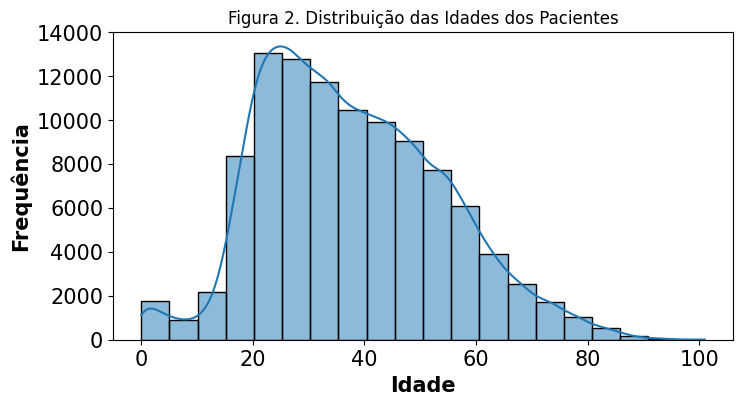

In [ ]:
# Verificando a Distribuição das Idades dos Pacientes

plt.figure(figsize=(8,4))
sns.histplot(df['idade'], bins=20, kde=True) # kde: Estimativa de densidade do kernel para suavizar a distribuição e mostrar no gráfico
plt.title('Figura 2. Distribuição das Idades dos Pacientes')
plt.xlabel('Idade', fontweight='bold', fontsize=15)
plt.ylabel('Frequência', fontweight='bold', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Distribuição das Idades dos Pacientes', dpi=300, bbox_inches='tight')
plt.show()

A Figura 2 apresenta a distribuição das idades dos pacientes no conjunto de dados. A análise mostra que a maior frequência de pacientes está na faixa etária de 20 a 25 anos. Também se observou que crianças de 5 a 10 anos têm uma menor frequência de casos de TB e, de forma similar, há uma diminuição da frequência a partir dos 60 anos. Ao verificar a contagem de casos por sexo, notou-se mais pacientes do sexo masculino, totalizando 68.755, enquanto havia 35.091 pacientes do sexo feminino.

In [ ]:
# Verificando a contagem de pacientes por faixa etária
df.faixaEtaria.value_counts()

,count
faixaEtaria,
20_29,25617
30_39,22566
40_49,19339
50_59,14449
60_69,7035
15_19,6842
70_79,3006
10_14,1599
01_04,1136


In [ ]:
# Verificando a contagem da Situação Atual dos Pacientes no Dataset
df.sitAtual.value_counts()

,count
sitAtual,
Cura,91823
Abandono,12023


In [ ]:
# Visualizando através do display()
display(df.sitAtual)

,sitAtual
0,Abandono
1,Cura
2,Abandono
3,Cura
4,Cura
...,...
103841,Cura
103842,Cura
103843,Abandono
103844,Cura


Por fim, os registros foram agrupados e analisados conforme a faixa etária e a situação atual do paciente (abandono ou cura). Com base nos dados da Figura 4, observou-se mais pacientes curados na faixa etária de 19 a 30 anos, totalizando 24.895 pacientes. Devido à discrepância nos dados sobre a situação atual dos pacientes, notou-se um desbalanceamento entre as classes de cura e abandono. O conjunto de dados original compreende 103.846 registros e 47 características (features).

<ipython-input-49-764dfc573951>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = df.groupby(['faixaEtaria', 'sitAtual']).size().unstack(fill_value=0)


sitAtual     Abandono   Cura
faixaEtaria                 
0-18              457   6851
19-30            4320  24895
31-40            3451  19115
41-50            2253  17086
51-60            1009  13440
61-70             344   6691
71-80             143   2863
81-100             46    878


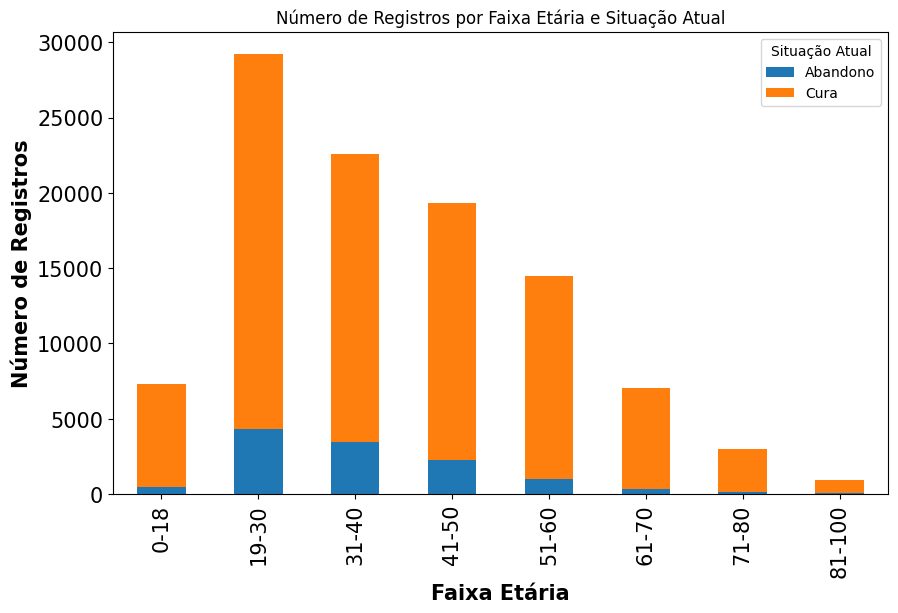

In [ ]:
#Faixas etárias
bins = [0, 18, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
df['faixaEtaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)

# Contar registros por faixa etária e sitAtual
contagem = df.groupby(['faixaEtaria', 'sitAtual']).size().unstack(fill_value=0)

# Exibir a tabela de contagem
print(contagem)

# Visualização
contagem.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Figura 4. Número de Registros por Faixa Etária e Situação Atual')
plt.xlabel('Faixa Etária', fontweight='bold', fontsize=15)
plt.ylabel('Número de Registros', fontweight='bold', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Situação Atual')
plt.savefig('Número de Registros por Faixa Etária e Situação Atual', dpi=300, bbox_inches='tight')
plt.show()

## **Tratamento de Valores Ausentes com Imputação**

Imputação de Valores Ausentes: Utilizou-se o *SimpleImputer* para preencher valores ausentes com a estratégia mais frequente (moda) para todas as colunas do dataframe. Isso garante que não haja mais valores ausentes no conjunto de dados.

In [ ]:
# Verificando os Valores
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103846 entries, 0 to 103845
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Unnamed: 0          103846 non-null  int64   
 1   racaCor             89811 non-null   object  
 2   faixaEtaria         103842 non-null  category
 3   sexo                103846 non-null  object  
 4   gestante            34483 non-null   object  
 5   ESCOLARID           83686 non-null   object  
 6   TIPOCUP             91755 non-null   object  
 7   codTratAnt          100217 non-null  float64 
 8   tratouha            103846 non-null  float64 
 9   sitAtual            103846 non-null  object  
 10  tipoCaso            103846 non-null  object  
 11  FORMACLIN1          103838 non-null  object  
 12  FORMACLIN2          3802 non-null    object  
 13  FORMACLIN3          231 non-null     object  
 14  classif             103845 non-null  object  
 15  descoberta       

In [ ]:
# Verificando os valores vazios por coluna
df.isnull()

,Unnamed: 0,racaCor,faixaEtaria,sexo,gestante,ESCOLARID,TIPOCUP,codTratAnt,tratouha,sitAtual,...,esqAtual,motMudEsquema,tipoTrat,nDosesPri,nDosesSeg,idade,HISTOPATOL,OUTRAIMUNO,resistencia,mtvInter1
0,False,False,False,False,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
2,False,True,False,False,True,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,True
3,False,True,False,False,True,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,True,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103841,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,True
103842,False,False,False,False,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,True
103843,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,True,False,True,True
103844,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,True


In [ ]:
True + True

2

In [ ]:
False + False

0

In [ ]:
#Contando os valores nulos da base
df.isnull().sum()

,0
Unnamed: 0,0
racaCor,14035
faixaEtaria,4
sexo,0
gestante,69363
ESCOLARID,20160
TIPOCUP,12091
codTratAnt,3629
tratouha,0
sitAtual,0


In [3]:
# Tratamento de valores ausentes com imputação
imputer = SimpleImputer(strategy='most_frequent') # substitui o valor ausente usando o valor mais frequente ao longo de cada coluna.
data_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
#Valores depois do tratamento

data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103846 entries, 0 to 103845
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          103846 non-null  object
 1   racaCor             103846 non-null  object
 2   faixaEtaria         103846 non-null  object
 3   sexo                103846 non-null  object
 4   gestante            103846 non-null  object
 5   ESCOLARID           103846 non-null  object
 6   TIPOCUP             103846 non-null  object
 7   codTratAnt          103846 non-null  object
 8   tratouha            103846 non-null  object
 9   sitAtual            103846 non-null  object
 10  tipoCaso            103846 non-null  object
 11  FORMACLIN1          103846 non-null  object
 12  FORMACLIN2          103846 non-null  object
 13  FORMACLIN3          103846 non-null  object
 14  classif             103846 non-null  object
 15  descoberta          103846 non-null  object
 16  ba

In [ ]:
data_imputed.isnull().sum()

,0
Unnamed: 0,0
racaCor,0
faixaEtaria,0
sexo,0
gestante,0
ESCOLARID,0
TIPOCUP,0
codTratAnt,0
tratouha,0
sitAtual,0


In [ ]:
# Verificar o tamanho do dataframe após a imputação de valores ausentes

print(f"Tamanho do dataset após imputação de valores ausentes: {data_imputed.shape}")

Tamanho do dataset após imputação de valores ausentes: (103846, 47)


## **Codificação de Variáveis Categóricas e Normalização de Variáveis Numéricas**

- Codificação One-Hot: Codifica variáveis categóricas usando OneHotEncoder, convertendo cada categoria em uma nova coluna binária.

- Normalização: Usa StandardScaler para normalizar variáveis numéricas (idade, nDosesPri, nDosesSeg) para terem média zero e desvio padrão um.

- Transformação da Variável de Saída: Usa LabelEncoder para transformar a variável de saída categórica ('sitAtual') em valores numéricos.

In [4]:
# Codificação de variáveis categóricas

#categorical_features = ['racaCor', 'ESCOLARID', 'TIPOCUP', 'tipoCaso'] # , 'gestante'
categorical_features = ['racaCor', 'sexo', 'TIPOCUP', 'ESCOLARID', 'tipoCaso', 'FORMACLIN1','hiv', 'DIABETES', 'TABAGISMO', 'classif',
                        'descoberta', 'bac', 'BACOUTRO', 'cultEsc', 'RX', 'NECROP', 'ALCOOLISMO', 'MENTAL', 'DROGADICAO',
                        'instTrat', 'esqIni', 'HISTOPATOL', 'faixaEtaria'
                        ]
encoder = OneHotEncoder() # Os recursos são codificados usando um esquema de codificação one-hot
encoded_features = encoder.fit_transform(data_imputed[categorical_features])

In [5]:
# Normalização de variáveis numéricas
#numerical_features = ['idade', 'nDosesPri', 'nDosesSeg']
numerical_features = ['idade', 'nDosesPri', 'nDosesSeg','TOTCOMUNIC', 'COMUNICEXA', 'COMUNICDOE' ]
scaler = StandardScaler() # Padroniza os recursos removendo a média e dimensionando para a variação unitária.
scaled_features = scaler.fit_transform(data_imputed[numerical_features])

In [6]:
# Transformar a variável de saída para numérica
label_encoder = LabelEncoder()
data_imputed['sitAtual'] = label_encoder.fit_transform(data_imputed['sitAtual'])

In [7]:
# Verificar as formas após codificação e normalização
print(f"Forma das variáveis categóricas codificadas: {encoded_features.shape}")
print(f"Forma das variáveis numéricas normalizadas: {scaled_features.shape}")

Forma das variáveis categóricas codificadas: (103846, 107)
Forma das variáveis numéricas normalizadas: (103846, 6)


In [8]:
# Variáveis de entrada e saída
X = np.hstack((encoded_features.toarray(), scaled_features))
y = data_imputed['sitAtual'].astype(int)

# Verificar as formas das variáveis de entrada e saída
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

Forma de X: (103846, 113)
Forma de y: (103846,)


In [ ]:
# Contando os valores em cada classe

y.value_counts()

,count
sitAtual,
1,91823
0,12023


In [ ]:
#Verificando a proporção

(y.value_counts()/y.shape[0]) * 100

,count
sitAtual,
1,88.422279
0,11.577721


In [9]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
#Verificando a proporção na base de treino
(y_train.value_counts()/y_train.shape[0]) * 100

,count
sitAtual,
1,88.422649
0,11.577351


In [14]:
# Contando a quantidade de registros na base de treino
y_train.value_counts()


,count
sitAtual,
1,73458
0,9618


In [15]:
# Na base de teste
(y_test.value_counts()/y_test.shape[0]) * 100



,count
sitAtual,
1,88.420799
0,11.579201


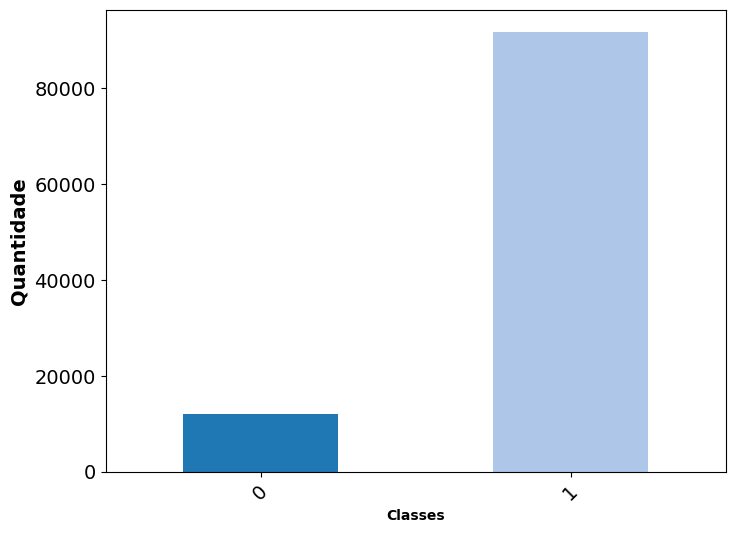

In [16]:
# Exemplo de contagem de classes
class_counts = pd.Series(y).value_counts().sort_index()

# Definindo cores diferentes para cada barra
colors = plt.cm.tab20.colors[:len(class_counts)]

# Gráfico de barras para visualização
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=colors)
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title('Distribuição das Classes')
plt.xticks(rotation=45)
plt.savefig('Distribuição_das_Classes.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
from collections import Counter

# Verificar o equilíbrio das classes
class_distribution = Counter(y)
majority_class = max(class_distribution.values())
minority_class = min(class_distribution.values())
class_ratio = minority_class / majority_class

## **Construção e Treinamento do Modelo MLP**

Modelo MLP: Construiu-se um modelo de rede neural sequencial (Sequential) com camadas densas (Dense), usando ativação ReLU para camadas ocultas e sigmoid para a camada de saída, adequada para classificação binária.

Compilação e Treinamento: Compilou-se o modelo com otimizador Adam, função de perda binary_crossentropy para problemas de classificação binária, e métrica de accuracy para avaliação durante o treinamento.

In [18]:
# Construção e treinamento do modelo MLP com Dropout
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

model.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8810 - loss: 0.3194 - val_accuracy: 0.8937 - val_loss: 0.2679
Epoch 2/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8925 - loss: 0.2782 - val_accuracy: 0.8949 - val_loss: 0.2682
Epoch 3/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8911 - loss: 0.2761 - val_accuracy: 0.8946 - val_loss: 0.2642
Epoch 4/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8933 - loss: 0.2721 - val_accuracy: 0.8949 - val_loss: 0.2669
Epoch 5/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8923 - loss: 0.2735 - val_accuracy: 0.8962 - val_loss: 0.2628
Epoch 6/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8923 - loss: 0.2686 - val_accuracy: 0.8959 - val_loss: 0.2630
Epoch 7/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8953 - loss: 0.2653 - val_accuracy: 0.8956 - val_loss: 0.2635
Epoch 8/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8941 - loss: 0.2681 - val_accurac

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,741 (268.52 KB)

 Trainable params: 22,913 (89.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 45,828 (179.02 KB)

## **Avaliação do Modelo (F1 e Acurácia Macro)**

Avaliação do Modelo: Calcula métricas de avaliação com F1 e Acurácia Macro, precisão e recall para avaliar o desempenho do modelo treinado.

Matriz de Confusão: Visualiza a matriz de confusão que mostra os verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos para avaliar o desempenho do modelo em detalhes.

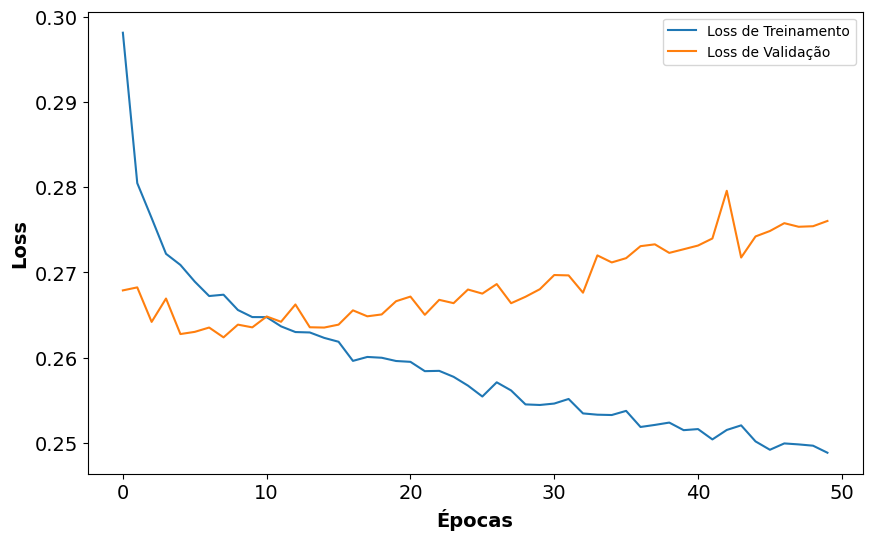

In [19]:
# Plotar a curva de aprendizado (Loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.xlabel('Épocas', fontweight='bold', fontsize=14)
plt.ylabel('Loss', fontweight='bold', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend()
#plt.title('Curva de Aprendizado (Loss)')
plt.savefig('Curva de Aprendizado', dpi=300, bbox_inches='tight')
plt.show()

650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Acurácia macro (dados desbalanceados): 0.6124
Precisão: 0.9084
Recall: 0.9791
F1-macro (dados desbalanceados): 0.6461
RMSE: 0.2792
MAE: 0.1549


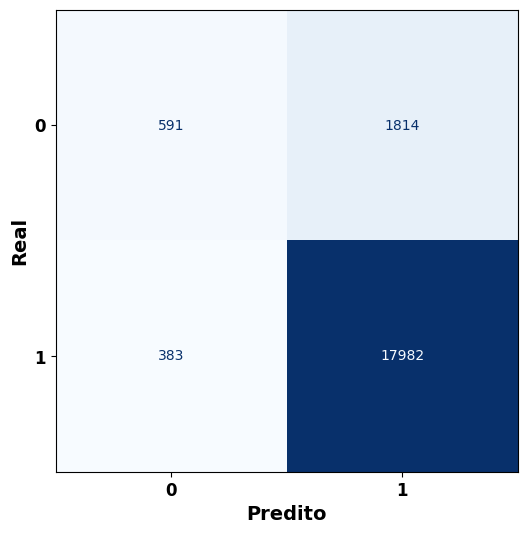

In [20]:
# Previsões F1 e Acurácia Macro
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Escolha da métrica F1 e acurácia com base no equilíbrio
if class_ratio >= 0.8:  # Considera-se equilibrado se a menor classe for pelo menos 80% da maior
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    accuracy_type = 'Acurácia micro (dados equilibrados)'
    f1_type = 'F1-micro (dados equilibrados)'
else:
    # Acurácia e F1 macro para dados desbalanceados
    accuracy = np.mean([accuracy_score(y_test[y_test == i], y_pred[y_test == i]) for i in np.unique(y_test)])
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy_type = 'Acurácia macro (dados desbalanceados)'
    f1_type = 'F1-macro (dados desbalanceados)'

# Cálculo de outras métricas
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
rmse = np.sqrt(mean_squared_error(y_test, y_pred_prob))
mae = mean_absolute_error(y_test, y_pred_prob)

# Exibição das métricas
print(f"{accuracy_type}: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"{f1_type}: {f1:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plotar a matriz de confusão com cmap ajustado
fig, ax = plt.subplots(figsize=(8, 6))  # Ajuste do tamanho da figura
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)

# Ajustar o tamanho da fonte dos valores dos eixos X e Y
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Ajustar o tamanho da fonte dos rótulos dos eixos
plt.xlabel('Predito', fontsize=14, fontweight='bold')
plt.ylabel('Real', fontsize=14, fontweight='bold')

# Salvar e exibir o gráfico com ajustes nos valores dos eixos
plt.savefig('Matriz de Confusão', dpi=300, bbox_inches='tight')
plt.show()

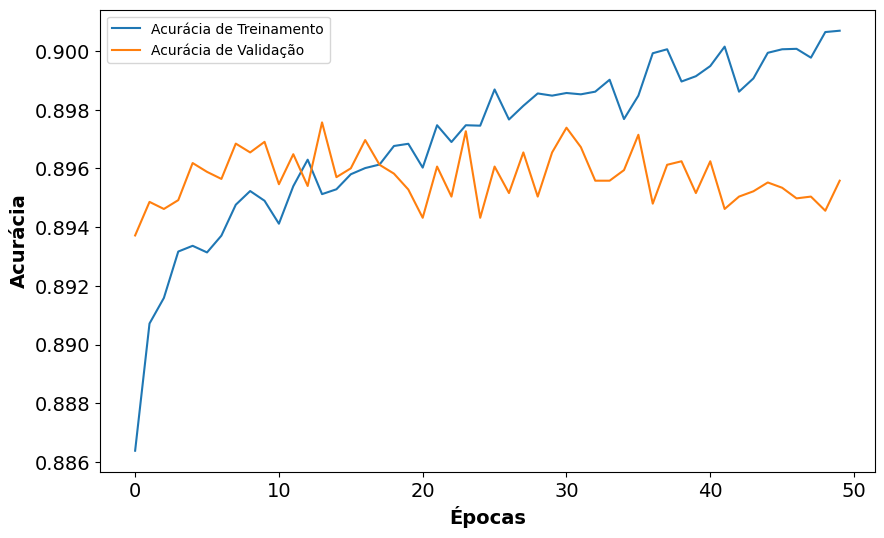

In [21]:
# Plotar a curva de acurácia para o conjunto de dados balanceado
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas', fontweight='bold', fontsize=14)
plt.ylabel('Acurácia', fontweight='bold', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend()
#plt.title(f'Curva de Acurácia ({accuracy_type})')
plt.savefig('Acurácia ao Longo das Épocas', dpi=300, bbox_inches='tight')
plt.show()

## **Avaliação do Modelo (acurácia, precisão, recall e F1-Score)**

Avaliação do Modelo: Calcula métricas de avaliação como acurácia, precisão, recall e F1-Score para avaliar o desempenho do modelo treinado.

Matriz de Confusão: Visualiza a matriz de confusão que mostra os verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos para avaliar o desempenho do modelo em detalhes.

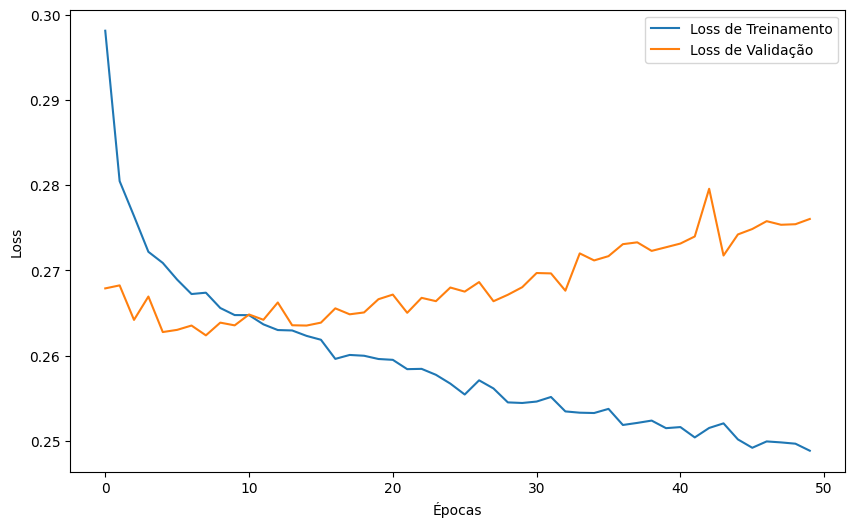

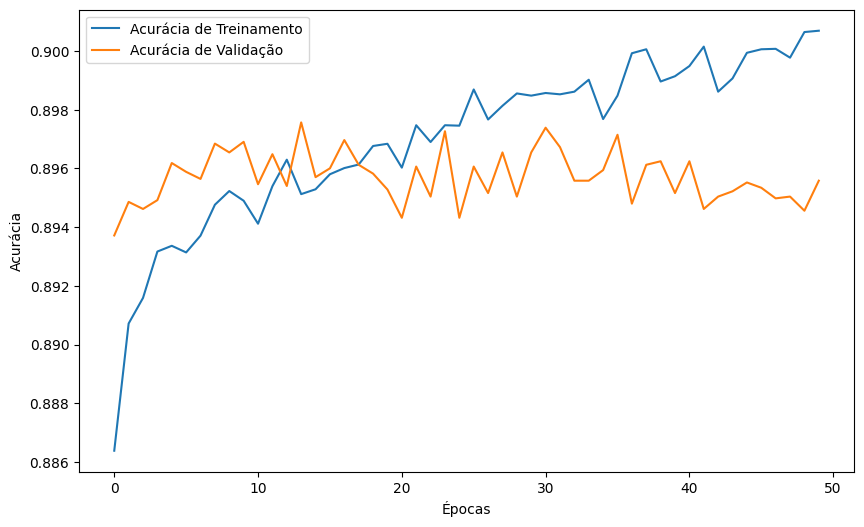

In [22]:
# Avaliação do modelo
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
#plt.title('Curva de Aprendizado')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Curva de Aprendizado', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
#plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.savefig('Acurácia ao Longo das Épocas', dpi=300, bbox_inches='tight')
plt.show()

650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Acurácia: 0.8942
Precisão: 0.9084
Recall: 0.9791
F1-Score: 0.9424


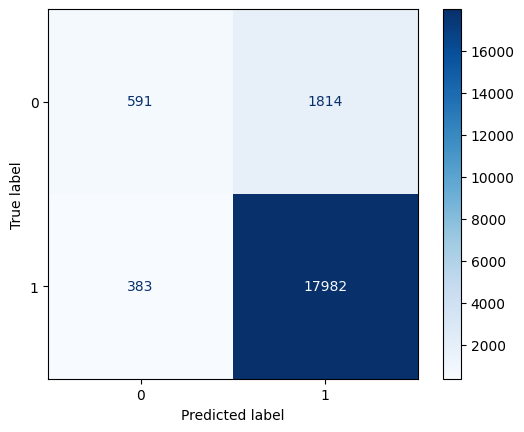

In [23]:
# Previsões
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Cálculo das métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
rmse = np.sqrt(mean_squared_error(y_test, y_pred_prob))
mae = mean_absolute_error(y_test, y_pred_prob)

# Exibição das métricas
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
#print(f"RMSE: {rmse:.4f}")
#print(f"MAE: {mae:.4f}")

# Matriz de Confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
#plt.title('Matriz de Confusão')
plt.savefig('Matriz de Confusão', dpi=300, bbox_inches='tight')
plt.show()

## **Modelo Usando Dropout + SMOTETomek (balanceamento)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7489 - loss: 0.5164 - val_accuracy: 0.7962 - val_loss: 0.4486
Epoch 2/50
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7933 - loss: 0.4551 - val_accuracy: 0.8025 - val_loss: 0.4333
Epoch 3/50
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8006 - loss: 0.4436 - val_accuracy: 0.8084 - val_loss: 0.4242
Epoch 4/50
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8036 - loss: 0.4390 - val_accuracy: 0.8155 - val_loss: 0.4158
Epoch 5/50
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8080 - loss: 0.4299 - val_accuracy: 0.8177 - val_loss: 0.4088
Epoch 6/50
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8132 - loss: 0.4224 - val_accuracy: 0.8207 - val_loss: 0.4051
Epoch 7/50
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8153 - loss: 0.4192 - val_accuracy: 0.8217 - val_loss: 0.3998
Epoch 8/50
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8189 - loss: 0.41

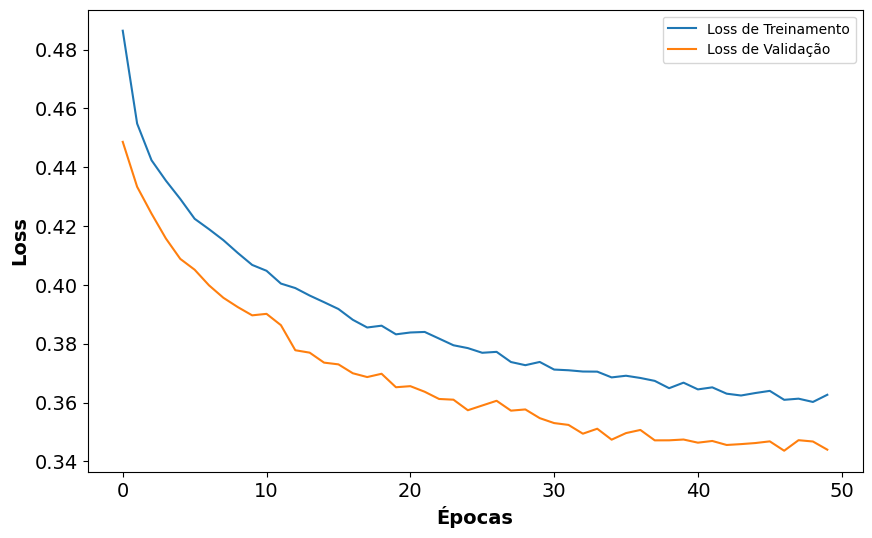

1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Acurácia micro (dados equilibrados): 0.8540
Precisão: 0.8742
Recall: 0.8265
F1-micro (dados equilibrados): 0.8540


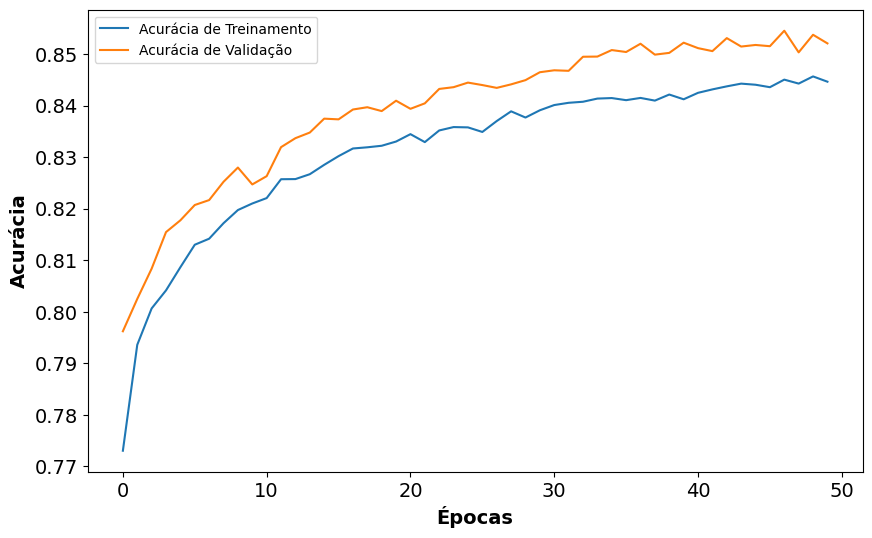

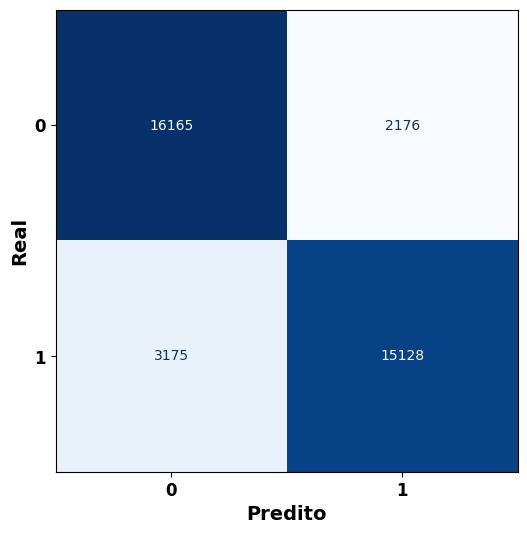

In [3]:
# Importações
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.combine import SMOTETomek
from collections import Counter

# Carregar os dados
data = pd.read_csv('tuberculosis.csv')

# Tratamento de valores ausentes com imputação
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Codificação de variáveis categóricas e normalização de variáveis numéricas
categorical_features = ['racaCor', 'sexo', 'TIPOCUP', 'ESCOLARID', 'tipoCaso', 'FORMACLIN1','hiv', 'DIABETES', 'TABAGISMO', 'classif',
                        'descoberta', 'bac', 'BACOUTRO', 'cultEsc', 'RX', 'NECROP', 'ALCOOLISMO', 'MENTAL', 'DROGADICAO',
                        'instTrat', 'esqIni', 'HISTOPATOL', 'faixaEtaria']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data_imputed[categorical_features])

numerical_features = ['idade', 'nDosesPri', 'nDosesSeg','TOTCOMUNIC', 'COMUNICEXA', 'COMUNICDOE' ]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_imputed[numerical_features])

# Transformar a variável de saída para numérica
label_encoder = LabelEncoder()
data_imputed['sitAtual'] = label_encoder.fit_transform(data_imputed['sitAtual'])

# Variáveis de entrada e saída
X = np.hstack((encoded_features.toarray(), scaled_features))
y = data_imputed['sitAtual'].astype(int)

# Balanceamento de classes com SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Verificar o equilíbrio das classes
class_distribution = Counter(y_resampled)
majority_class = max(class_distribution.values())
minority_class = min(class_distribution.values())
class_ratio = minority_class / majority_class

# Divisão dos dados balanceados
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Construção e treinamento do modelo MLP com Dropout
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Plotar a curva de aprendizado (Loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.xlabel('Épocas', fontweight='bold', fontsize=14)
plt.ylabel('Loss', fontweight='bold', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend()
#plt.title('Curva de Aprendizado (Loss)')
plt.savefig('Curva de Aprendizado', dpi=300, bbox_inches='tight')
plt.show()

# Previsões
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Escolha da métrica F1 e acurácia com base no equilíbrio
if class_ratio >= 0.8:  # Considera-se equilibrado se a menor classe for pelo menos 80% da maior
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    accuracy_type = 'Acurácia micro (dados equilibrados)'
    f1_type = 'F1-micro (dados equilibrados)'
else:
    # Acurácia e F1 macro para dados desbalanceados
    accuracy = np.mean([accuracy_score(y_test[y_test == i], y_pred[y_test == i]) for i in np.unique(y_test)])
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy_type = 'Acurácia macro (dados desbalanceados)'
    f1_type = 'F1-macro (dados desbalanceados)'

# Escolha da métrica F1 com base no equilíbrio
#if class_ratio >= 0.8:  # Considera-se equilibrado se a menor classe for pelo menos 80% da maior
#    f1 = f1_score(y_test, y_pred, average='micro')
 #   f1_type = 'F1-micro (dados equilibrados)'
#else:
 #   f1 = f1_score(y_test, y_pred, average='macro')
  #  f1_type = 'F1-macro (dados desbalanceados)'

# Cálculo das métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
rmse = np.sqrt(mean_squared_error(y_test, y_pred_prob))
mae = mean_absolute_error(y_test, y_pred_prob)

# Plotar a curva de acurácia para o conjunto de dados balanceado
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas', fontweight='bold', fontsize=14)
plt.ylabel('Acurácia', fontweight='bold', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
#plt.title(f'Curva de Acurácia ({accuracy_type})')
plt.savefig('Acurácia ao Longo das Épocas', dpi=300, bbox_inches='tight')
plt.show()

# Exibição das métricas
#print(f"Acurácia: {accuracy:.4f}")
print(f"{accuracy_type}: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"{f1_type}: {f1:.4f}")
#print(f"RMSE: {rmse:.4f}")
#print(f"MAE: {mae:.4f}")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# Plotar a matriz de confusão com cmap ajustado
fig, ax = plt.subplots(figsize=(8, 6))  # Ajuste do tamanho da figura
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
# Ajustar o tamanho da fonte dos valores dos eixos X e Y
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
# Ajustar o tamanho da fonte dos rótulos dos eixos
plt.xlabel('Predito', fontsize=14, fontweight='bold')
plt.ylabel('Real', fontsize=14, fontweight='bold')
# Salvar e exibir o gráfico com ajustes nos valores dos eixos
plt.savefig('Matriz de Confusão', dpi=300, bbox_inches='tight')
plt.show()



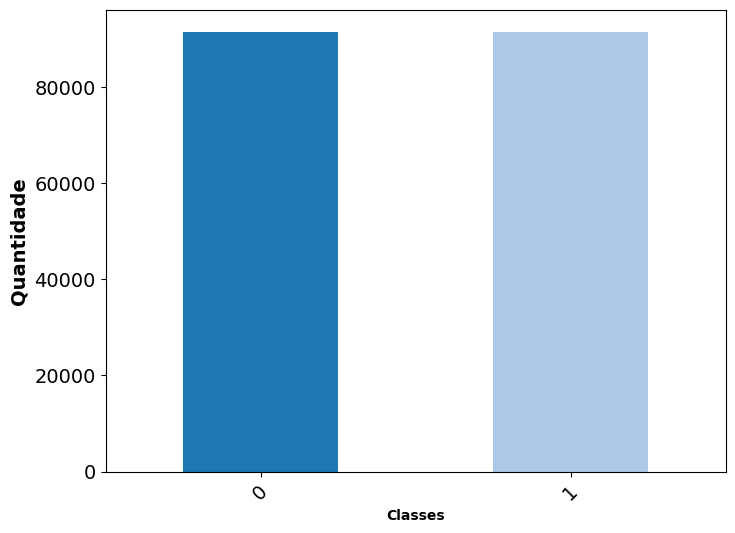

In [4]:
# Exemplo de contagem de classes
class_counts = pd.Series(y_resampled).value_counts().sort_index()

# Definindo cores diferentes para cada barra
colors = plt.cm.tab20.colors[:len(class_counts)]

# Gráfico de barras para visualização
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=colors)
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold', fontsize=14 )
#plt.title('Distribuição das Classes')
plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Distribuição_das_Classes_Normalizadas.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
y_resampled.value_counts()

,count
sitAtual,
0,91608
1,91608
